# Advanced Monte Carlo
---
## Visualization of the Influence of the Hyperparameters

© 2025 Yvan Richard

**Foreword**

In this notebook, we use the data computed in our code `TestMC_02.cpp` to visualize how the standard deviation and the standard error behave on the different batches when we change the hyperparameters.

## 1. Load the Data

We load the csv data set and the relevant libraries:

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load our created data set:

In [24]:
# load data set
df_stats = pd.read_csv('../data/results.csv', skiprows=1)
df_stats.head()

,batch,N,NSim,price,sd,se,exact,abs_err,rel_err,hit_origin
0,Batch1,50,5000,2.082180,4.412515,0.062402,2.133368,0.051189,0.023994,0
1,Batch1,50,50000,2.073873,4.435755,0.019837,2.133368,0.059495,0.027888,0
2,Batch1,50,500000,2.133826,4.511713,0.006381,2.133368,0.000458,0.000215,0
3,Batch1,500,5000,2.017295,4.556760,0.064442,2.133368,0.116073,0.054409,0
4,Batch1,500,50000,2.161052,4.575363,0.020462,2.133368,0.027684,0.012977,0


## 2. Visualizations

Now, we plot some heatmap for batch 01 and 02 to visualize how the sd and se changes in function of $m$ and $n$:

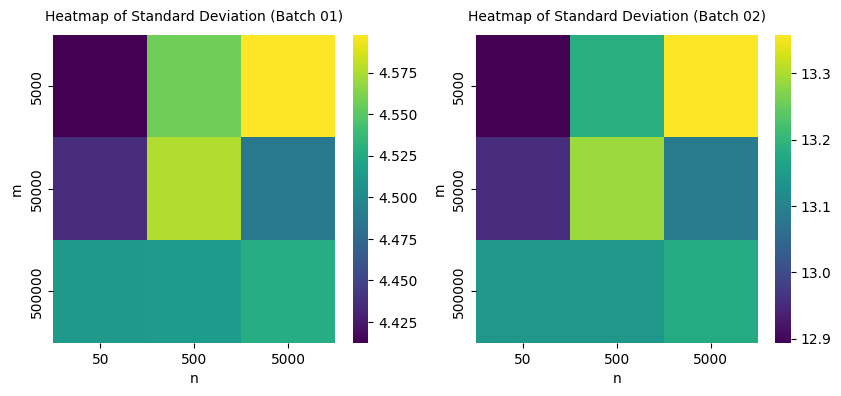

In [25]:
# heatmap for batch 01 sd
# select data for batch 01
df_batch01 = df_stats[df_stats['batch'] == 'Batch1'].copy()

# rename columns for clarity
df_batch01.rename(columns={'NSim': 'm', 'N': 'n'}, inplace=True)

# pivot the data for heatmap
heatmap_data_sd = df_batch01.pivot(index='m', columns='n', values='sd')

# heatmap for batch 02 sd
# select data for batch 02
df_batch02 = df_stats[df_stats['batch'] == 'Batch2'].copy()

# rename columns for clarity
df_batch02.rename(columns={'NSim': 'm', 'N': 'n'}, inplace=True)

# pivot the data for heatmap
heatmap_data_se = df_batch02.pivot(index='m', columns='n', values='sd')

# plot the heatmap for standard deviation
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(heatmap_data_sd, cmap='viridis', ax=ax[0])
ax[0].set_title('Heatmap of Standard Deviation (Batch 01)', fontsize=10, pad=10)
sns.heatmap(heatmap_data_se, cmap='viridis', ax=ax[1])
ax[1].set_title('Heatmap of Standard Deviation (Batch 02)', fontsize=10, pad=10)
plt.savefig('../images/heatmap_sd_batches.png', dpi=500)
plt.show()


We do the same but for standard error:

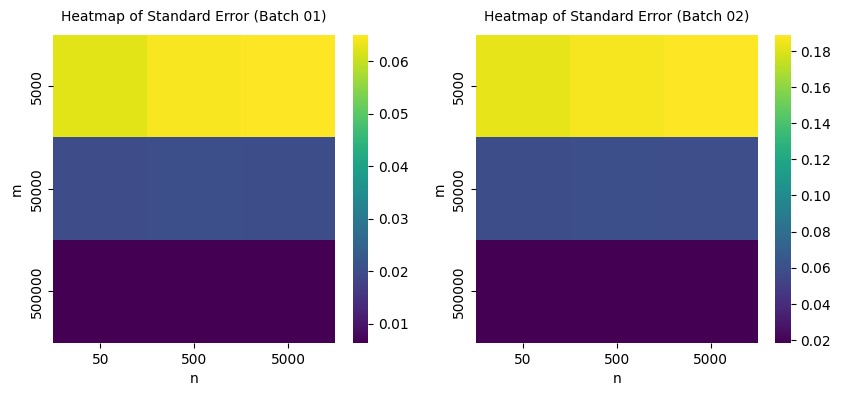

In [26]:
# Same for standard error
# pivot the data for heatmap
heatmap_data_se = df_batch01.pivot(index='m', columns='n', values='se')

# pivot the data for heatmap
heatmap_data_se2 = df_batch02.pivot(index='m', columns='n', values='se')

# plot the heatmap for standard error
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(heatmap_data_se, cmap='viridis', ax=ax[0])
ax[0].set_title('Heatmap of Standard Error (Batch 01)', fontsize=10, pad=10)
sns.heatmap(heatmap_data_se2, cmap='viridis', ax=ax[1])
ax[1].set_title('Heatmap of Standard Error (Batch 02)', fontsize=10, pad=10)
plt.savefig('../images/heatmap_se_batches.png', dpi=500)
plt.show()

Finally, we realize a heatmap for the relative errors.

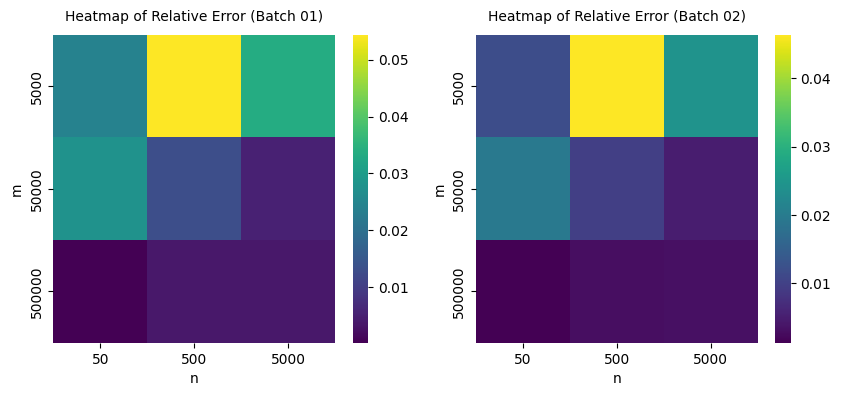

In [29]:
# heatmap for batch 01 rel_err
# pivot the data for heatmap
heatmap_data_relerr = df_batch01.pivot(index='m', columns='n', values='rel_err')

# batch 02 rel_err
# pivot the data for heatmap
heatmap_data_relerr2 = df_batch02.pivot(index='m', columns='n', values='rel_err')

# plot the heatmap for relative error
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(heatmap_data_relerr, cmap='viridis', ax=ax[0])
sns.heatmap(heatmap_data_relerr2, cmap='viridis', ax=ax[1])
ax[0].set_title('Heatmap of Relative Error (Batch 01)', fontsize=10, pad=10)
ax[1].set_title('Heatmap of Relative Error (Batch 02)', fontsize=10, pad=10)
plt.savefig('../images/heatmap_relerr_batches.png', dpi=500)
plt.show()